# 可视化CNN各层

我们加载一个已经训练好的FashionMNIST模型, 并使用特征可视化技术, 了解神经网络学会了提取哪些特征.

In [1]:
import fmnist
import fmnist_io
import fmnist_model

## 加载数据集

In [2]:
_, test_loader, classes = fmnist_io.load_fmnist_data()

## 加载模型

In [5]:
import torch

model = fmnist_model.CNN();
model.load_state_dict(torch.load('saved_model/fashion_net.pt'))
print(model)

CNN(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=500, out_features=50, bias=True)
  (fc_drop): Dropout(p=0.4)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


## 查看第一层卷积层过滤器

First Convolutional Layer


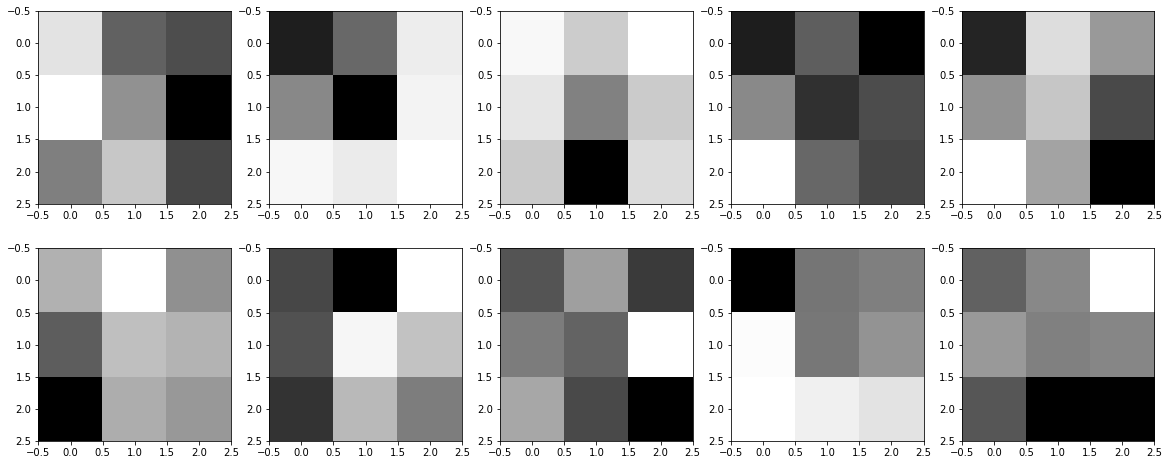

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# 获取第一层的conv layer
weights = model.conv1.weight.data
w = weights.numpy()

fig = plt.figure(figsize=(20, 8))
columns = 56
rows = 2

for i in range(0, columns * rows):
    
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(w[i][0], cmap='gray')
    
print('First Convolutional Layer')
plt.show()

## 查看图像经过第一层卷积后的激活特征图


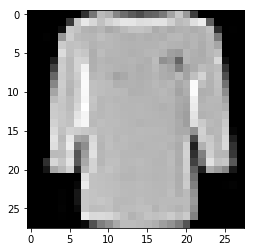

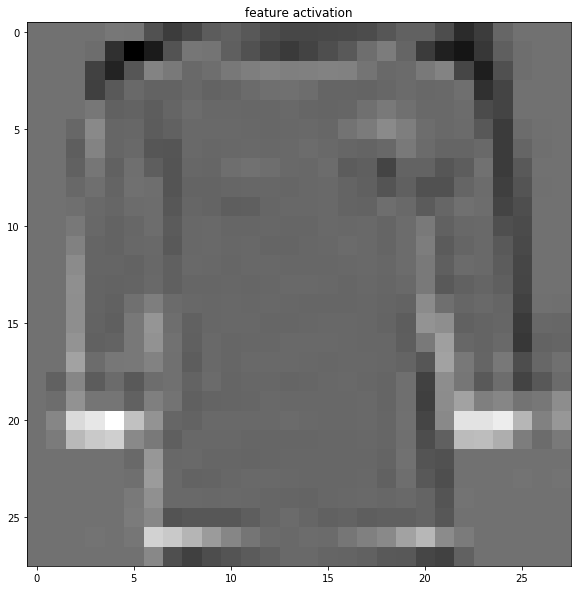

In [12]:
import cv2
import numpy as np

data_iter = iter(test_loader)
images, labels = data_iter.next()
images = images.numpy()

idx = 3
img = np.squeeze(images[idx])

plt.imshow(img, cmap='gray')

weights = model.conv1.weight.data
w = weights.numpy()

flg = plt.figure(figsize=(30, 10))
columns = 5 * 2
rows = 2

for i in range(0, columns * rows):
    
    fig.add_subplot(rows, columns, i + 1)
    if i % 2 == 0:
        plt.title('Origin image')
        plt.imshow(w[int(i / 2)][0], cmap='gray')
    else:
        plt.title('feature activation')
        c = cv2.filter2D(img, -1, w[int((i - 1) / 2)][0])
        plt.imshow(c, cmap='gray')
        
plt.show()

## 查看图像经过第二层卷积后的激活特征图


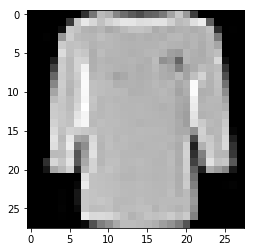

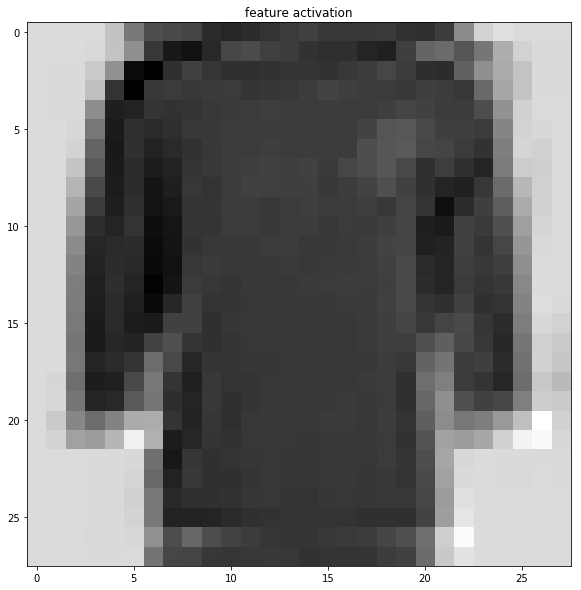

In [13]:
plt.imshow(img, cmap='gray')

weights = model.conv2.weight.data
w = weights.numpy()

flg = plt.figure(figsize=(30, 10))
columns = 5 * 2
rows = 2 * 2

for i in range(0, columns * rows):
    
    fig.add_subplot(rows, columns, i + 1)
    if i % 2 == 0:
        plt.title('Origin image')
        plt.imshow(w[int(i / 2)][0], cmap='gray')
    else:
        plt.title('feature activation')
        c = cv2.filter2D(img, -1, w[int((i - 1) / 2)][0])
        plt.imshow(c, cmap='gray')
        
plt.show()